# Research Skills: Spatiotemporal Data Analyis
## Take-home Assignment
Sharon Ong, Department of Cognitive Science and Artificial Intelligence,
Tilburg University
Academic Year 2023-2024

Your First Name: Daniel

Your Last Name: Koltai

Your Student ID: 2123303

Some cells incorporate copilot suggestions and code from the practical notebooks

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install libpysal
!pip install esda
!pip install spreg

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import libpysal as ps
import esda
import spreg

# Part 2A: Estimating the percentage of votes in the 2023 Netherlands election with spatial autoregression
1. [4 points]

Load your dataset of election results (XXXXX party.csv). Compute the percentage of votes the party received in each municipality. This is your target variable. Create a histogram plot of your target variable and the features; average income, average house price and population density. Are the target variable and features normally distributed?

In [3]:
df = pd.read_csv('2123303_spatial.csv')

In [4]:
df.head()

,GM_NAAM,GM_CODE,OuderRegioCode,GrootOuderRegioCode,TotalVotes,BBB,Average_House_Price,Average_Income,Population_Density,Population_Increase
0,Groningen,G0014,K1,P20,146649,3331,258.9,23.3,1266,57
1,Almere,G0034,K5,P24,104685,2721,294.3,24.7,1686,1365
2,Stadskanaal,G0037,K1,P20,19335,1582,185.5,20.5,271,-189
3,Veendam,G0047,K1,P20,16441,1013,187.5,21.6,362,-41
4,Zeewolde,G0050,K5,P24,14376,1071,275.7,25.7,94,140


In [5]:
df['y'] = df['BBB'] / df['TotalVotes'] * 100

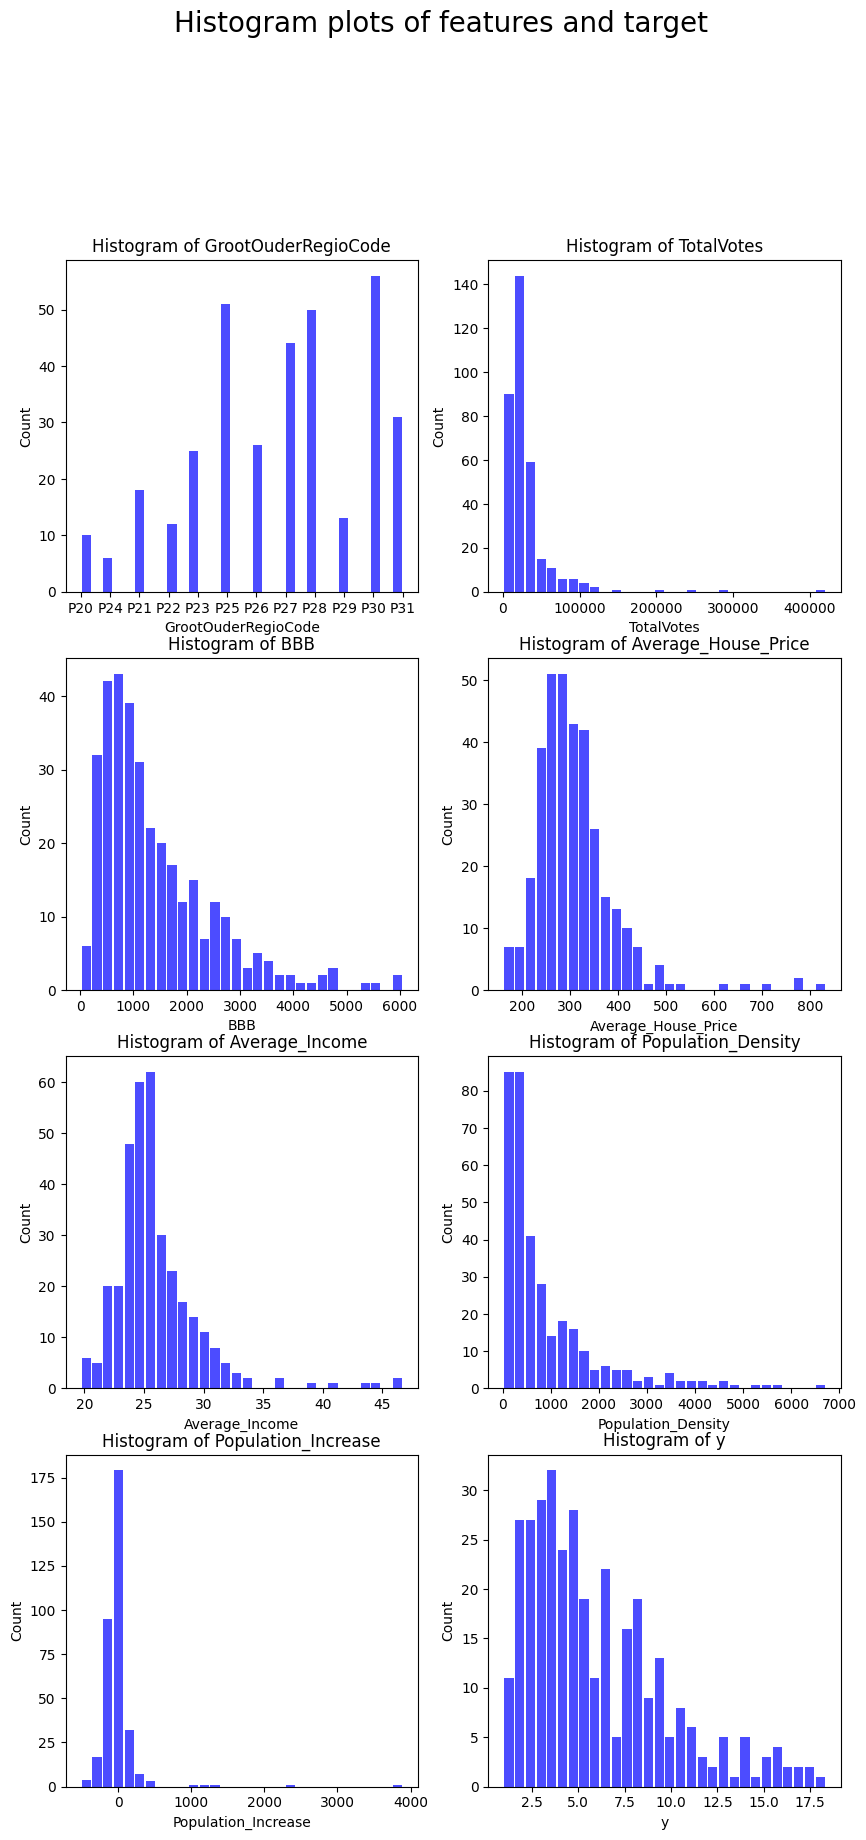

In [6]:
plt.figure(figsize=(10, 25))
plt_no = 1
for i in range(3, len(df.columns)):
    feature = df.columns[i]
    plt.subplot(5, 2, plt_no)
    plt.hist(df[feature], bins=30, color='blue', alpha=0.7, rwidth=0.85)
    plt.xlabel(f'{feature}')
    plt.ylabel('Count')
    plt.title(f'Histogram of {feature}')
    plt_no += 1
plt.suptitle(f'Histogram plots of features and target', size=20)
plt.show()


- total votes, BBB votes, average house price, average income, population density, population increase, target (percentage of votes for BBB) are all normally distributed

2. [6 points]
Load the shapefile of the townships of the Netherlands and display the first five rows. Remove all the polygons (and multipolygons) representing water. Note, you do not have to display the Choropleth Map of your results, but you can if you want to. Create a new column called Pct Votes in the geodataframe and copy over the contents in column containing the percentage of votes in the dataframe from Question 1. Display a Choropleth Map of the townships, with colors assigned by Pct Votes (columns=Pct Votes). Use a quantiles scheme with 5 quantiles.

In [7]:
# Load the shapefile of the townships of the Netherlands and display the first five rows
import os
path = os.path.join('wijkbuurtkaart_2023_v1', 'gemeenten_2023_v1.shp')
w = gpd.read_file(path)
w.head()


,GM_CODE,GM_NAAM,H2O,OAD,STED,BEV_DICHTH,AANT_INW,AANT_MAN,AANT_VROUW,P_00_14_JR,...,P_GEBBL_EU,P_GEBBL_NE,OPP_TOT,OPP_LAND,OPP_WATER,JRSTATCODE,JAAR,layer,path,geometry
0,GM0034,Almere,JA,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,...,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,2023GM0034,2023,2023 — gemeente_2023_v1water,\\cbsp.nl\Productie\primair\TOP\Werk\KWB_buurt...,"MULTIPOLYGON (((150087.299 479382.379, 150000...."
1,GM0050,Zeewolde,JA,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,...,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,2023GM0050,2023,2023 — gemeente_2023_v1water,\\cbsp.nl\Productie\primair\TOP\Werk\KWB_buurt...,"MULTIPOLYGON (((155047.320 474836.246, 155049...."
2,GM0060,Ameland,JA,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,...,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,2023GM0060,2023,2023 — gemeente_2023_v1water,\\cbsp.nl\Productie\primair\TOP\Werk\KWB_buurt...,"POLYGON ((196000.000 608000.000, 195250.000 60..."
3,GM0072,Harlingen,JA,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,...,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,2023GM0072,2023,2023 — gemeente_2023_v1water,\\cbsp.nl\Productie\primair\TOP\Werk\KWB_buurt...,"MULTIPOLYGON (((158000.000 581000.000, 158331...."
4,GM0088,Schiermonnikoog,JA,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,...,-99999999.0,-99999999.0,-99999999.0,-99999999.0,-99999999.0,2023GM0088,2023,2023 — gemeente_2023_v1water,\\cbsp.nl\Productie\primair\TOP\Werk\KWB_buurt...,"POLYGON ((219000.000 616201.447, 219000.000 61..."


In [8]:
# Remove all the polygons (and multipolygons) representing water
print(len(w))
w = w.loc[w.H2O == 'NEE'].copy()
print(len(w))

424
343


In [9]:
# Create a new column called Pct Votes in the geodataframe and copy over the contents in column containing the percentage of votes in the dataframe from Question 1.
w['Pct Votes'] = w['GM_NAAM'].map(df.set_index('GM_NAAM')['y'])
w['BBB'] = w['GM_NAAM'].map(df.set_index('GM_NAAM')['BBB'])
w['TotalVotes'] = w['GM_NAAM'].map(df.set_index('GM_NAAM')['TotalVotes'])
w['Average_Income'] = w['GM_NAAM'].map(df.set_index('GM_NAAM')['Average_Income'])
w['Average_House_Price'] = w['GM_NAAM'].map(df.set_index('GM_NAAM')['Average_House_Price'])
w['Population_Density'] = w['GM_NAAM'].map(df.set_index('GM_NAAM')['Population_Density'])

Text(0.5, 1.0, 'Percentage of votes per municipality')

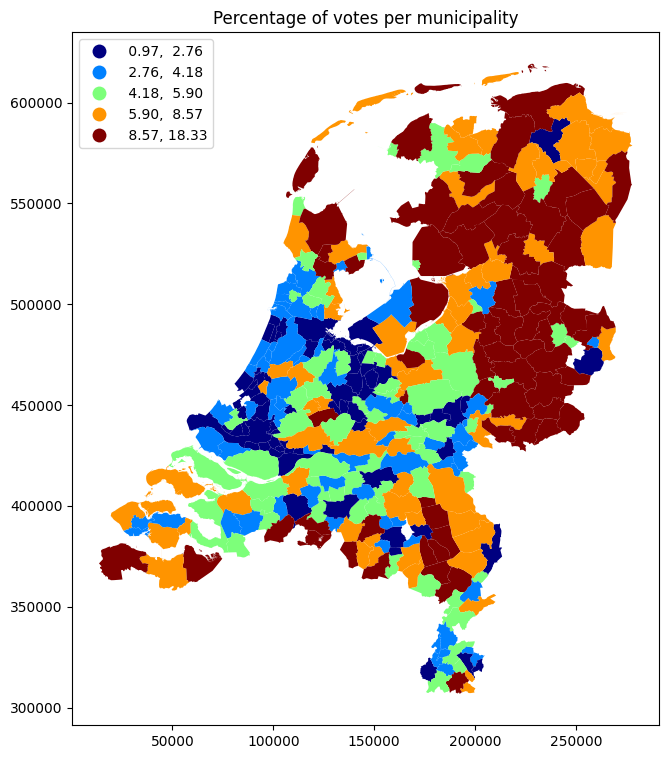

In [10]:
w.plot(figsize=(9, 9), column='Pct Votes', scheme='QUANTILES', k=5, cmap='jet', legend=True, legend_kwds={'loc': 'upper left'})
plt.title('Percentage of votes per municipality')

3. [10 points]

Using contiguity based weighting schemes (rook and queen) and KNN based weighingt schemes, compute and compare the global autocorrelation (Global Moran’s I) of Pct Votes and the log transformation of the Pct Votes. Try at least 2 different K number of neighbours. Which feature (Pct Votes or its log transformation) has a higher autocorrelation?

In [11]:
# surpress warnings
import warnings
warnings.filterwarnings('ignore')

# drop every row with nan values
w = w.dropna(subset=['Pct Votes'])

# Using contiguity based weighting schemes (Queen and Rook)
wq = ps.weights.Queen.from_dataframe(w)
wr = ps.weights.Rook.from_dataframe(w)

# Using knn based weighting schemes
wknn = {}
for i in range(1, 20, 3):
    wknn[i] = ps.weights.KNN.from_dataframe(w, k=i)
    wknn[i].transform = "r"

w['log Pct Votes'] = np.log(w['Pct Votes'] + 0.001)

# Compute the global Moran's I for 'Pct Votes' using Queen weights
mi = esda.Moran(w['Pct Votes'], wq)
mi_log = esda.Moran(w['log Pct Votes'], wq)

# Printing Moran's I results for all weight schemes
print("Moran's I for Queen weights on Pct Votes and log Pct Votes:")
print(f"Pct Votes: {mi.I}, p-value: {mi.p_sim}")
print(f"log Pct Votes: {mi_log.I}, p-value: {mi_log.p_sim}")
print("\n")

# Try at least 2 different K number of neighbours
mi_knn = {}
print("Moran's I for KNN weights on Pct Votes and log Pct Votes:")
for i in range(1, 20, 3):
    print(f"KNN with {i} neighbours")
    mi_knn[i] = esda.Moran(w['Pct Votes'], wknn[i])
    print(f"Pct Votes: {mi_knn[i].I}, p-value: {mi_knn[i].p_sim}")
    mi_knn[i] = esda.Moran(w['log Pct Votes'], wknn[i])
    print(f"log Pct Votes: {mi_knn[i].I}, p-value: {mi_knn[i].p_sim}")


('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')
Moran's I for Queen weights on Pct Votes and log Pct Votes:
Pct Votes: 0.5642690505653737, p-value: 0.001
log Pct Votes: 0.5508650029798585, p-value: 0.001


Moran's I for KNN weights on Pct Votes and log Pct Votes:
KNN with 1 neighbours
Pct Votes: 0.566518127108475, p-value: 0.001
log Pct Votes: 0.602225938621241, p-value: 0.001
KNN with 4 neighbours
Pct Votes: 0.5211177982995758, p-value: 0.001
log Pct Votes: 0.5379562168800698, p-value: 0.001
KNN with 7 neighbours
Pct Votes: 0.5240121928185107, p-value: 0.001
log Pct Votes: 0.5052970879234379, p-value: 0.001
KNN with 10 neighbours
Pct Votes: 0.49854645350616206, p-value: 0.001
log Pct Votes: 0.4805543983853459, p-value: 0.001
KNN with 13 neighbours
Pct Votes: 0.47082328781147625, p-value: 0.001
log Pct Votes: 0.45514473861074134, p-value: 0.001
KNN with 16 neighbours
Pct Votes: 0.44892419938380485, p-value: 0.001
log Pct Votes: 0.43498

- Pct Votes and log Pct Votes has similar global autocorrelations for all weights, and they are all statistifically significant
- The highest autocorrelation is KNN with 1 neighbour and log Pct Votes (0.6)

4. [10 points]
Compute the local autocorrelation for the same two features. Choose the weighting scheme and parameters for which gave you the highest correlation in 3.3. Identify the ’hotspots’ and ’coldspots’ by display the hotspots as these townships with different colors in a scatter plot.

Text(0.5, 1.0, 'coldspots for log Pct Votes with Knn weights (n=1)')

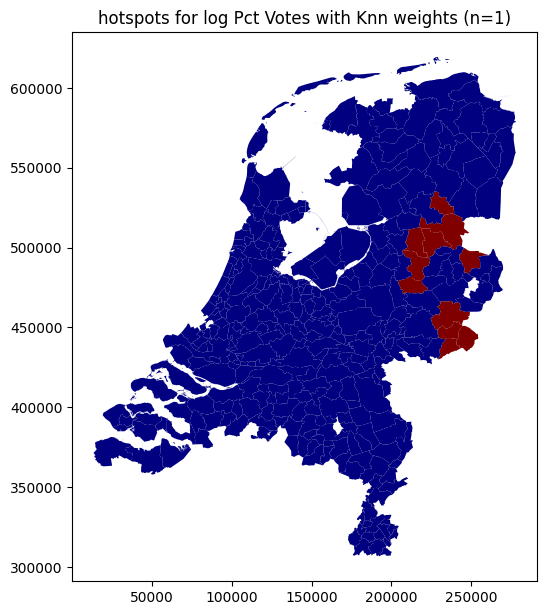

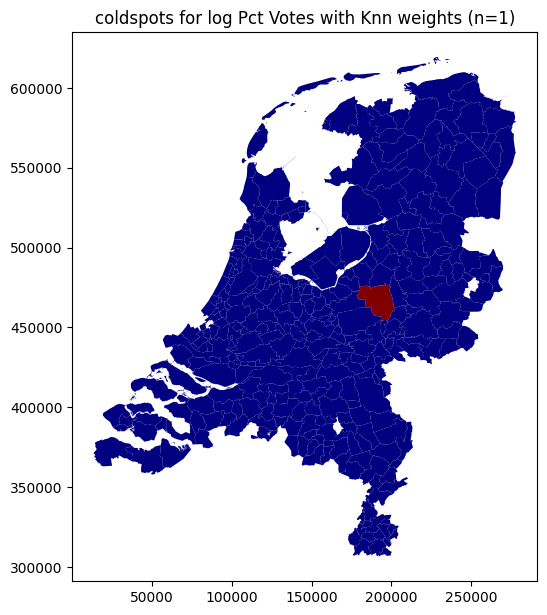

In [12]:
# highest autocorrelation for log pct votes with knn weights with 1 neighbours (where p-value is significant)
I_district_log_pct_votes_knn = esda.Moran_Local(w['log Pct Votes'], wknn[1])
sig = I_district_log_pct_votes_knn.p_sim < 0.05
hotspot = sig * I_district_log_pct_votes_knn.q==1
coldspot = sig * I_district_log_pct_votes_knn.q==2

w.plot(hotspot, figsize=(6,12), cmap = 'jet')
plt.title('hotspots for log Pct Votes with Knn weights (n=1)')
w.plot(coldspot, figsize=(6,12), cmap = 'jet')
plt.title('coldspots for log Pct Votes with Knn weights (n=1)')

5. [2 points] Perform a log transformation of your target variable, population density, average income and average house price features

In [13]:
w['log TotalVotes'] = np.log(w['TotalVotes'] + 0.001)
w['log Population_Density'] = np.log(w['Population_Density'] + 0.001)
w['log Average_Income'] = np.log(w['Average_Income'] + 0.001)
w['log Average_House_Price'] = np.log(w['Average_House_Price'] + 0.001)
w['log Pct Votes'] = np.log(w['Pct Votes'] + 0.001)


In [14]:
weight_matrix, ids = wq.full()

# Fit OLS model
variable_names = ['log Population_Density', 'log Average_Income', 'log Average_House_Price']
import numpy as np
m1 = spreg.OLS(w['log Pct Votes'].values, w[variable_names].values, name_y='log BBB', name_x=variable_names)
print(m1.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :     log BBB                Number of Observations:         335
Mean dependent var  :      1.5908                Number of Variables   :           4
S.D. dependent var  :      0.6338                Degrees of Freedom    :         331
R-squared           :      0.7647
Adjusted R-squared  :      0.7625
Sum squared residual:     31.5713                F-statistic           :    358.5073
Sigma-square        :       0.095                Prob(F-statistic)     :  1.313e-103
S.E. of regression  :       0.309                Log likelihood        :     -79.729
Sigma-square ML     :       0.094                Akaike info criterion :     167.458
S.E of regression ML:      0.3070                Schwarz criterion     :     182.714

------------------------------------------------------------

6. [8 points]
Your goal is to estimate of Pct Votes (log values) per municipality based on the explanatory variables (the average house price and population density) and the spatially lagged Pct Votes (endogenous regressor). Please use the log form of the variables from Question 5 for this question. Please use the “spreg” package for this task and the weighting scheme you selected in Question 4. Chose two weighing
scheme to compare
(a) Fit a linear regression model, where your target variable is the Pct Votes (in log form) and your features (exploratory variables) are population density, average income and average house price features (in log form).
(b) Using the GM Lag, run a spatial autoregression model with the features in (a).
Compare the mean square error for these 4 estimators. Which regressor model resulted in the lowest
mean square error

In [15]:
geometries = gpd.GeoDataFrame(w, geometry='geometry')
queen_w = ps.weights.contiguity.Queen.from_dataframe(geometries)
queen_w.transform = 'R'

('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')


In [16]:
queen_w = ps.weights.contiguity.Queen.from_dataframe(w)
queen_w.transform = 'R'
knn_w = ps.weights.distance.KNN.from_dataframe(w, k=1)
knn_w.transform = 'R'

('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 12, ' is an island (no neighbors)')


In [17]:
y = w['log Pct Votes']

variable_names = ['log Population_Density', 'log Average_Income', 'log Average_House_Price']
import numpy as np
m1 = spreg.OLS(w['log Pct Votes'].values, w[variable_names].values, w=queen_w, name_y='log Pct Votes', name_x=variable_names)
m2 = spreg.OLS(w['log Pct Votes'].values, w[variable_names].values, w=knn_w, name_y='log Pct Votes', name_x=variable_names)
m3 = spreg.GM_Lag(w['log Pct Votes'].values, w[variable_names].values, w=queen_w, name_y='log Pct Votes', name_x=variable_names)
m4 = spreg.GM_Lag(w['log Pct Votes'].values, w[variable_names].values, w=knn_w, name_y='log Pct Votes', name_x=variable_names)

predictions1 = m1.predy
predictions2 = m2.predy
predictions3 = m3.predy
predictions4 = m4.predy

mse1 = np.mean((y - predictions1.flatten())**2)
mse2 = np.mean((y - predictions2.flatten())**2)
mse3 = np.mean((y - predictions3.flatten())**2)
mse4 = np.mean((y - predictions4.flatten())**2)

print("MSE - OLS, queen weights: ", mse1)
print("MSE - OLS, knn weights: ", mse2)
print("MSE - GM_Lag, queen weights: ", mse3)
print("MSE - GM_Lag, knn weights: ", mse4)


MSE - OLS, queen weights:  0.09424258734182786
MSE - OLS, knn weights:  0.09424258734182786
MSE - GM_Lag, queen weights:  0.08739662827682732
MSE - GM_Lag, knn weights:  0.09305651346821787


- All models perform similary
- GM_Lag with queen weights has the lowest MSE: 0.087

In [18]:
print("OLS, queen weights:")
print(m1.summary)
print("OLS, knn weights:")
print(m2.summary)
print("GM_Lag, queen weights:")
print(m3.summary)
print("GM_Lag, knn weights:")
print(m4.summary)

OLS, queen weights:
REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :log Pct Votes                Number of Observations:         335
Mean dependent var  :      1.5908                Number of Variables   :           4
S.D. dependent var  :      0.6338                Degrees of Freedom    :         331
R-squared           :      0.7647
Adjusted R-squared  :      0.7625
Sum squared residual:     31.5713                F-statistic           :    358.5073
Sigma-square        :       0.095                Prob(F-statistic)     :  1.313e-103
S.E. of regression  :       0.309                Log likelihood        :     -79.729
Sigma-square ML     :       0.094                Akaike info criterion :     167.458
S.E of regression ML:      0.3070                Schwarz criterion     :     182.714

---------------------------------------